In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [6]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [7]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [9]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [10]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [11]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [12]:
categorical_columns

['lead_source', 'industry', 'employment_status', 'location']

In [13]:
df['annual_income'] = pd.to_numeric(df['annual_income'], errors='coerce')

In [14]:
for col in categorical_columns:
    df[col] = df[col].fillna('NA')

In [15]:
df.isnull().sum()

lead_source                   0
industry                      0
number_of_courses_viewed      0
annual_income               181
employment_status             0
location                      0
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [16]:
df['annual_income'] = df['annual_income'].fillna(0)

In [17]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [20]:
df['industry'].value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

In [21]:
df.nunique()

lead_source                    6
industry                       8
number_of_courses_viewed      10
annual_income               1268
employment_status              5
location                       8
interaction_count             12
lead_score                   101
converted                      2
dtype: int64

In [22]:
data_numeric = df.copy()

data_numeric = data_numeric.drop(columns=categorical_columns)
data_numeric.head()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
0,1,79450.0,4,0.94,1
1,1,46992.0,1,0.80,0
2,5,78796.0,3,0.69,1
3,2,83843.0,1,0.87,0
4,3,85012.0,3,0.62,1


In [23]:
data_numeric.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,52472.172367,2.976744,0.506108,0.619015
std,1.449717,24254.347030,1.681564,0.288465,0.485795
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,44097.250000,2.000000,0.262500,0.000000
50%,2.000000,57449.500000,3.000000,0.510000,1.000000
75%,3.000000,68241.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


In [24]:
data_numeric.corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879,0.435914
annual_income,0.009770,1.000000,0.027036,0.015610,0.053131
interaction_count,-0.023565,0.027036,1.000000,0.009888,0.374573
lead_score,-0.004879,0.015610,0.009888,1.000000,0.193673
converted,0.435914,0.053131,0.374573,0.193673,1.000000


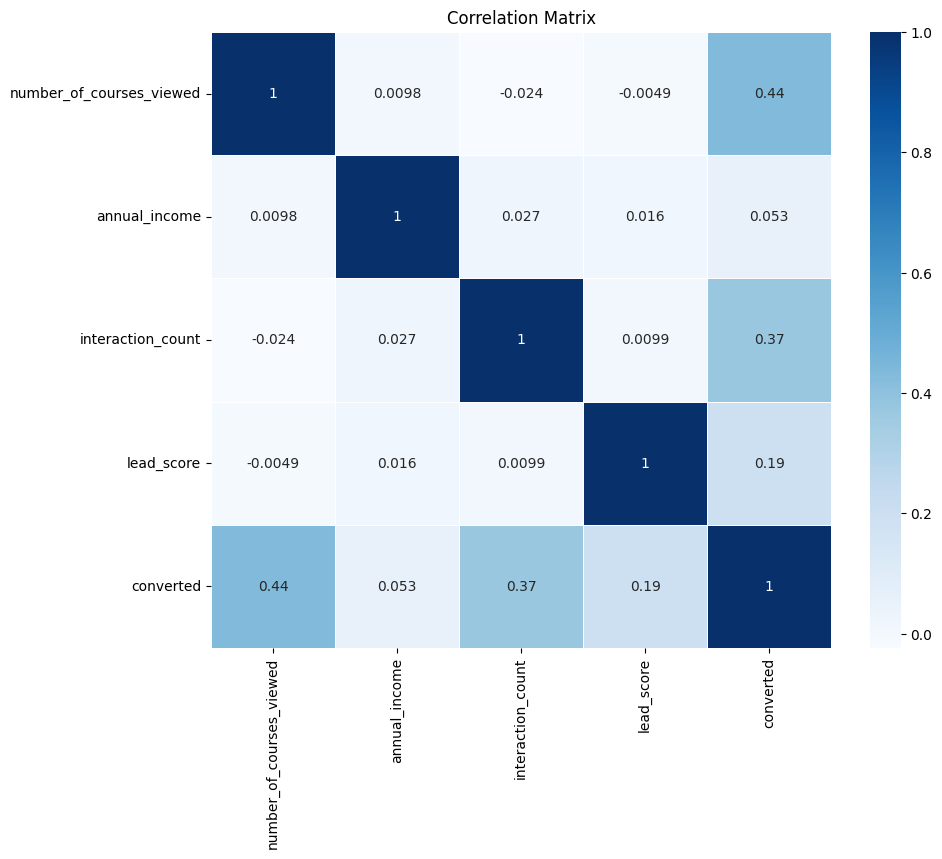

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, linewidths=0.5, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [36]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [37]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [38]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [39]:
y_train = df_train['converted']
y_val = df_val['converted']
y_test = df_test['converted']

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [40]:
df_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,paid_ads,retail,0,58472.0,student,middle_east,5,0.03
1,organic_search,manufacturing,3,71738.0,student,middle_east,6,0.77
2,paid_ads,technology,3,81973.0,employed,north_america,2,0.59
3,NA,technology,1,74956.0,employed,europe,3,0.34
4,organic_search,retail,3,59335.0,student,australia,1,0.98


In [41]:
from sklearn.metrics import mutual_info_score


In [46]:
for col in categorical_columns:
    mi_score = mutual_info_score(df_train[col], y_train)
    print(f'Mutual Information between {col} and converted: {round(mi_score,2)}') 

Mutual Information between lead_source and converted: 0.04
Mutual Information between industry and converted: 0.01
Mutual Information between employment_status and converted: 0.01
Mutual Information between location and converted: 0.0


In [47]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical_columns + ['annual_income']].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + ['annual_income']].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [49]:
model.intercept_[0]

np.float64(2.0845609677909177e-06)

In [51]:
model.coef_[0].round(10)

array([ 8.3076e-06, -3.9060e-07,  1.8924e-06,  1.1654e-06,  2.1058e-06,
       -2.6883e-06, -5.9180e-07,  2.5868e-06, -3.3760e-07,  3.3850e-07,
        5.1390e-07,  2.6060e-07, -4.2840e-07, -2.5750e-07,  1.4294e-06,
        7.6800e-08,  6.2310e-07, -3.7521e-06,  4.1541e-06, -4.4670e-07,
        3.6390e-07,  1.8670e-07, -6.9000e-09,  5.0470e-07,  1.3590e-06,
        1.0035e-06, -4.4060e-07, -8.8580e-07])

In [52]:
y_pred = model.predict_proba(X_val)[:, 1]

In [56]:
conversion_decision = (y_pred >= 0.5).astype(int)

In [57]:
conversion_decision

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [58]:
(y_val == conversion_decision).mean()

np.float64(0.5767918088737202)